**Integrantes**

- Juan David Bojato Pacheco
- Jesus Santiago Jarava
- Jefferson Sierra

**Instrucciones**

* Ejecutar todas las celdas (CTRL + F9)
* Observar las medidas de desempeño y conclusiones de cada punto.

## **Conjunto de datos de entrenamiento**

Empleando el dataset load_digits correspondiente a la libreria sklearn, se preparó un conjunto de datos de entrenamiento (70% de los datos) y uno de prueba (30% de los datos), el cual se utilizará en cada uno de los casos presentados. Adicionalmente se estableció un valor aleatoria a la semilla, con el fin de asegurar la repetibilidad de los procedimientos

In [ ]:


from sklearn.datasets import load_digits
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from tabulate import tabulate
import graphviz
from sklearn.metrics import accuracy_score
from sklearn import datasets
import matplotlib.pyplot as plt 


np.random.seed(1870)
X, y = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)



# **Números del dataset Load_digits**

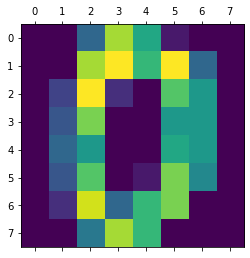

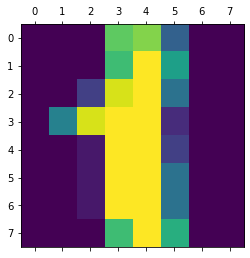

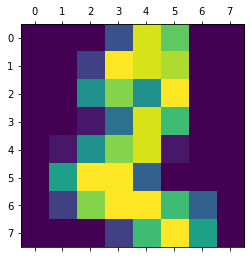

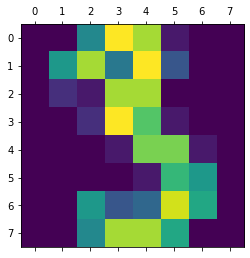

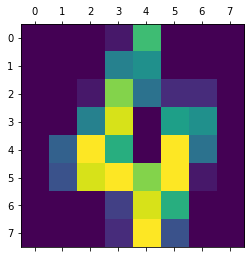

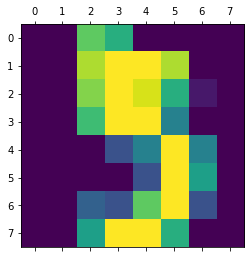

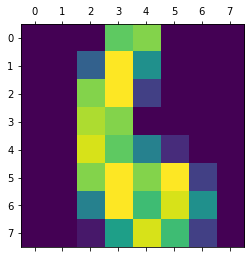

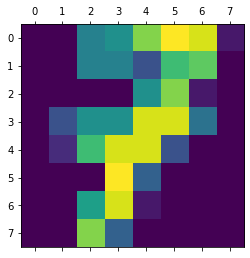

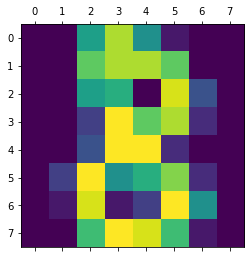

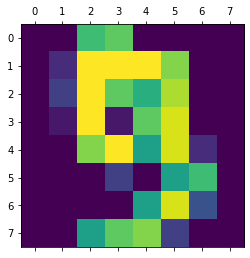

In [ ]:
digits = load_digits()
for i in range(0,10,1):
  plt.matshow(digits.images[i]) 
  plt.show() 


# **Composición**

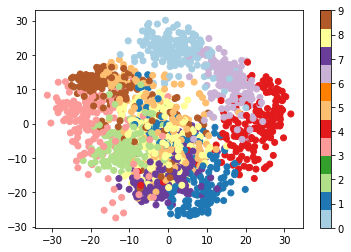

In [ ]:
plt.figure()

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
proj = pca.fit_transform(digits.data)
plt.scatter(proj[:, 0], proj[:, 1], c=digits.target, cmap="Paired")
plt.colorbar()

# **Función accuracy**
Permite determinar el % de exactitud que existe entre los datos reales y los datos predichos.

In [ ]:
def accuracy(clf, y_test, X_test):
  y_predict = clf.predict(X_test)

  #Accuracy
  accuracy = accuracy_score(y_test,y_predict)
  return print("El accuracy es", accuracy)

# **Función Acertados**

Permite determinar por cada número el % de acertados utilizando la matriz de confusión

In [ ]:
def acertados(cm):
  totalH = np.apply_along_axis(sum, 1, cm)
  totalV = np.apply_along_axis(sum,0,cm)
  print(totalV)
  n = len(totalH)
  elementosDiagonal = np.asarray(cm)
  diagonal = np.diagonal(elementosDiagonal)
  for i in range(0,n,1):
   valorReales = diagonal[i]
   valorTotalesH = np.sum(totalH[i])
   valorTotalesV = np.sum(totalV[i])
   valorFalsos = valorTotalesH + valorTotalesV - (2*valorReales)
   valoresDefinitivos = valorReales + valorFalsos
   print("Numero",i ,"")
   print("Acertados ", valorReales)
   print("No acertados ", valorFalsos)
   print("El porcentaje de acertados es ",(valorReales/valoresDefinitivos)*100,"%")

# **Parametros**

En el primer punto se alteraran una serie de parametros con la finalidad de observar su incidencia en el accuracy de cada uno de los árboles de decisión. Estos parametros son:


* **max_depth:** Nos indica que tan profundo puede llegar a ser el arbol de decisión. Entre mas profundo sea el arbol, será capaz de recopilar mayor información acerca de los datos originales. Sin embargo, para grandes cantidades de información, el arbol puede sufrir un sobreajuste.  
* **min_samples_split:** Especifica el número de muestras requeridas para dividir un nodo interno. 
* **min_samples_leaf:** Corresponde al minimo número de muestras requeridas para ser un nodo hoja.

Se usaran dos medidas de desempeño, **el accuracy y la matriz de confusión**, las cuales nos permitiran comprobar la efectividad de cada uno de los árboles de decisión para predecir datos.

Por otra parte, se hara un **test** por cada conjunto de arboles, para determinar como cambia el accuracy al modificar constantemente un parametro.

## **1. Arboles de decisión**

- **Dos árboles de decisión, cada uno con un nivel diferente de profundidad.**

In [ ]:
# Primer arbol
clf = tree.DecisionTreeClassifier(
    criterion= "entropy",
    splitter= "best",
    max_depth=5,
    min_samples_split= 20,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    class_weight=None,
    ccp_alpha = 0.0)
clf = clf.fit(X, y)



 **Medidas de desempeño del Sistema**

**Accuracy**

In [ ]:
accuracy(clf,y_test,X_test)


El accuracy es 0.837037037037037


**Matriz de confusión**

In [ ]:

y_predicho = clf.predict(X_test)

cm = confusion_matrix(y_test, y_predicho)
print(cm)
acertados(cm)

[[43  0  0  0  1  0  0  0  1  0]
 [ 1 49  1  0  0  0  0  0  1  0]
 [ 1  4 41  4  0  0  0  0  3  0]
 [ 0  5  1 44  1  0  0  0  3  0]
 [ 0  0  0  0 34  0  0  2 12  0]
 [ 0  3  0  0  3 46  0  0  2  3]
 [ 0  1  1  0  0  0 55  0  3  0]
 [ 0  1  0  0  1  0  0 37 12  2]
 [ 0  2  0  0  0  0  0  0 57  2]
 [ 0  3  0  3  1  0  0  0  4 46]]
[45 68 44 51 41 46 55 39 98 53]
Numero 0 
Acertados  43
No acertados  4
El porcentaje de acertados es  91.48936170212765 %
Numero 1 
Acertados  49
No acertados  22
El porcentaje de acertados es  69.01408450704226 %
Numero 2 
Acertados  41
No acertados  15
El porcentaje de acertados es  73.21428571428571 %
Numero 3 
Acertados  44
No acertados  17
El porcentaje de acertados es  72.1311475409836 %
Numero 4 
Acertados  34
No acertados  21
El porcentaje de acertados es  61.81818181818181 %
Numero 5 
Acertados  46
No acertados  11
El porcentaje de acertados es  80.7017543859649 %
Numero 6 
Acertados  55
No acertados  5
El porcentaje de acertados es  91.66666666666666

**Arbol**

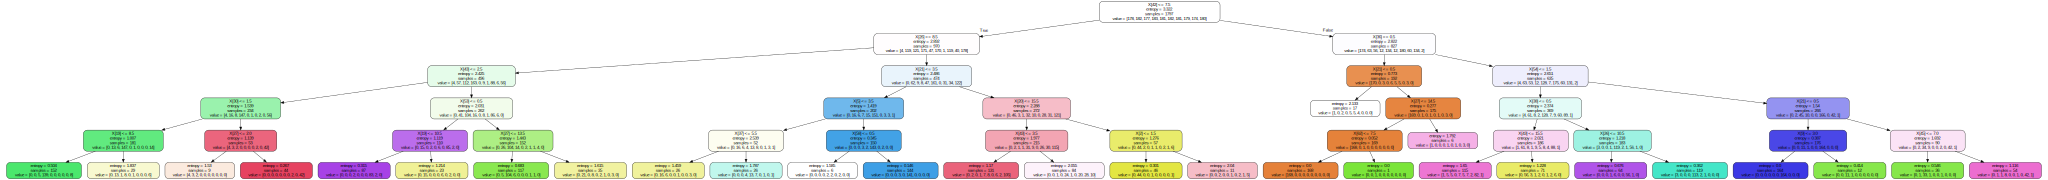

In [ ]:
dot_data = tree.export_graphviz(clf, out_file=None,
                                filled=True,rounded=True) 
graph = graphviz.Source(dot_data)

graph

In [ ]:
# Segundo arbol
clf = tree.DecisionTreeClassifier(
    criterion= "entropy",
    splitter= "best",
    max_depth=20,
    min_samples_split= 20,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    class_weight=None,
    ccp_alpha = 0.0)
clf = clf.fit(X, y)



 **Medidas de desempeño del Sistema**

**Accuracy**

In [ ]:
accuracy(clf,y_test,X_test)


El accuracy es 0.9277777777777778


**Matriz de confusión**

In [ ]:

y_predicho = clf.predict(X_test)

cm = confusion_matrix(y_test, y_predicho)
print(cm)
acertados(cm)

[[43  0  0  0  1  0  0  0  1  0]
 [ 1 51  0  0  0  0  0  0  0  0]
 [ 1  2 45  0  0  0  0  0  2  3]
 [ 0  0  2 49  0  1  0  0  1  1]
 [ 0  0  0  0 45  0  0  0  3  0]
 [ 0  0  0  2  2 49  2  0  0  2]
 [ 0  1  0  1  0  0 58  0  0  0]
 [ 0  0  0  0  1  1  1 49  0  1]
 [ 0  0  0  0  0  0  0  1 59  1]
 [ 0  0  0  3  0  1  0  0  0 53]]
[45 54 47 55 49 52 61 50 66 61]
Numero 0 
Acertados  43
No acertados  4
El porcentaje de acertados es  91.48936170212765 %
Numero 1 
Acertados  51
No acertados  4
El porcentaje de acertados es  92.72727272727272 %
Numero 2 
Acertados  45
No acertados  10
El porcentaje de acertados es  81.81818181818183 %
Numero 3 
Acertados  49
No acertados  11
El porcentaje de acertados es  81.66666666666667 %
Numero 4 
Acertados  45
No acertados  7
El porcentaje de acertados es  86.53846153846155 %
Numero 5 
Acertados  49
No acertados  11
El porcentaje de acertados es  81.66666666666667 %
Numero 6 
Acertados  58
No acertados  5
El porcentaje de acertados es  92.06349206349206

**Arbol**

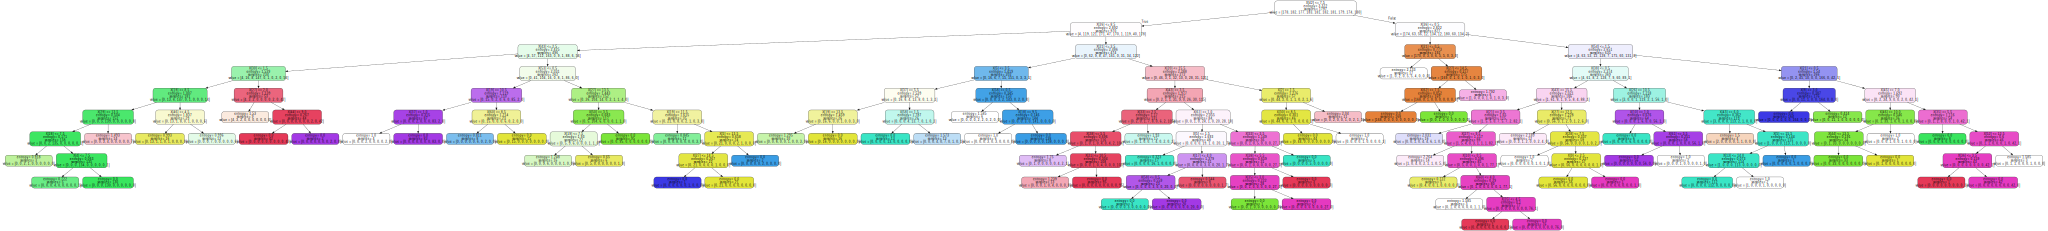

In [ ]:
dot_data = tree.export_graphviz(clf, out_file=None,
                                filled=True,rounded=True) 
graph = graphviz.Source(dot_data)

graph

**Test**

In [ ]:
limite = 5;
while (limite < 50):
    clf = tree.DecisionTreeClassifier(
      criterion= "entropy",
      splitter= "best",
      max_depth=limite,
      min_samples_split= 20,
      min_weight_fraction_leaf=0.0,
      max_features=None,
      random_state=None,
      max_leaf_nodes=None,
      class_weight=None,
      ccp_alpha = 0.0)
    clf = clf.fit(X, y)
    print("max_depth con un valor de ",limite)
    accuracy(clf,y_test,X_test)
    limite = limite + 5;

max_depth con un valor de  5
El accuracy es 0.837037037037037
max_depth con un valor de  10
El accuracy es 0.9277777777777778
max_depth con un valor de  15
El accuracy es 0.9277777777777778
max_depth con un valor de  20
El accuracy es 0.9277777777777778
max_depth con un valor de  25
El accuracy es 0.9277777777777778
max_depth con un valor de  30
El accuracy es 0.9277777777777778
max_depth con un valor de  35
El accuracy es 0.9277777777777778
max_depth con un valor de  40
El accuracy es 0.9277777777777778
max_depth con un valor de  45
El accuracy es 0.9277777777777778


**Conclusiones**

Al observar el comportamiento de ambos arboles cuyos parametros son los mismos (exceptuando por el max_depth), se puede afirmar que para este conjunto de datos, a medida que aumenta la profundidad, el accuracy también aumenta. Esto lo pudimos comprobar al realizar un test previo, en el cual al aumentar el valor de max_depth, el accuracy también incrementaba. Por tal motivo, decidimos colocar el valor de 20 como max_depth ya que con dicho valor se puede obtener el máximo accuracy posible.

- **Dos árboles de decisión (diferentes a los anteriores), sin limitar la profundidad, pero cada uno con diferentes números de nodos hoja.**

In [ ]:
clf = tree.DecisionTreeClassifier(
    criterion= "entropy",
    splitter= "best",
    min_samples_split= 40,
    min_samples_leaf=10,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    class_weight=None,
    ccp_alpha = 0.0)
clf = clf.fit(X, y)


 **Medidas de desempeño del Sistema**

**Accuracy**

In [ ]:
accuracy(clf,y_test,X_test)


El accuracy es 0.8814814814814815


**Matriz de confusión**

In [ ]:

y_predicho = clf.predict(X_test)

cm = confusion_matrix(y_test, y_predicho)
print(cm)
acertados(cm)

[[44  0  0  0  1  0  0  0  0  0]
 [ 1 49  1  0  0  0  0  0  1  0]
 [ 2  3 40  1  0  0  0  0  4  3]
 [ 0  4  1 46  1  0  0  0  1  1]
 [ 1  0  0  0 41  1  0  2  3  0]
 [ 0  3  0  0  4 46  2  0  0  2]
 [ 0  1  1  0  0  0 57  0  1  0]
 [ 0  1  0  0  0  1  1 48  0  2]
 [ 0  1  0  1  0  0  0  0 57  2]
 [ 1  3  0  0  1  0  0  2  2 48]]
[49 65 43 48 48 48 60 52 69 58]
Numero 0 
Acertados  44
No acertados  6
El porcentaje de acertados es  88.0 %
Numero 1 
Acertados  49
No acertados  19
El porcentaje de acertados es  72.05882352941177 %
Numero 2 
Acertados  40
No acertados  16
El porcentaje de acertados es  71.42857142857143 %
Numero 3 
Acertados  46
No acertados  10
El porcentaje de acertados es  82.14285714285714 %
Numero 4 
Acertados  41
No acertados  14
El porcentaje de acertados es  74.54545454545455 %
Numero 5 
Acertados  46
No acertados  13
El porcentaje de acertados es  77.96610169491525 %
Numero 6 
Acertados  57
No acertados  6
El porcentaje de acertados es  90.47619047619048 %
Numero 7

**Arbol**

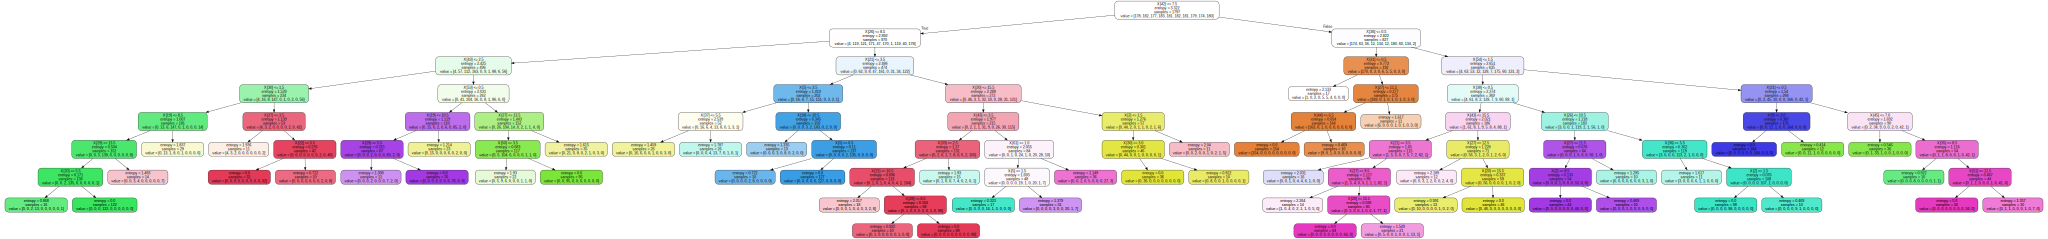

In [ ]:
dot_data = tree.export_graphviz(clf, out_file=None,
                                filled=True,rounded=True) 
graph = graphviz.Source(dot_data)

graph

In [ ]:
clf = tree.DecisionTreeClassifier(
    criterion= "entropy",
    splitter= "best",
    min_samples_split= 40,
    min_samples_leaf=20,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    class_weight=None,
    ccp_alpha = 0.0)
clf = clf.fit(X, y)



 **Medidas de desempeño del Sistema**

**Accuracy**

In [ ]:
accuracy(clf,y_test,X_test)


El accuracy es 0.8537037037037037


**Matriz de confusión**

In [ ]:

y_predicho = clf.predict(X_test)

cm = confusion_matrix(y_test, y_predicho)
print(cm)

acertados(cm)


[[42  0  0  0  0  0  0  0  0  3]
 [ 0 49  1  0  0  0  0  0  1  1]
 [ 1  4 40  4  1  0  0  0  2  1]
 [ 0  5  1 44  1  0  0  0  3  0]
 [ 2  0  0  0 41  1  0  3  1  0]
 [ 1  4  0  0  3 46  0  0  1  2]
 [ 0  1  3  0  1  0 53  0  2  0]
 [ 0  2  0  0  1  1  0 47  1  1]
 [ 0  3  0  0  2  0  0  0 55  1]
 [ 0  5  0  3  1  0  0  2  2 44]]
[46 73 45 51 51 48 53 52 68 53]
Numero 0 
Acertados  42
No acertados  7
El porcentaje de acertados es  85.71428571428571 %
Numero 1 
Acertados  49
No acertados  27
El porcentaje de acertados es  64.47368421052632 %
Numero 2 
Acertados  40
No acertados  18
El porcentaje de acertados es  68.96551724137932 %
Numero 3 
Acertados  44
No acertados  17
El porcentaje de acertados es  72.1311475409836 %
Numero 4 
Acertados  41
No acertados  17
El porcentaje de acertados es  70.6896551724138 %
Numero 5 
Acertados  46
No acertados  13
El porcentaje de acertados es  77.96610169491525 %
Numero 6 
Acertados  53
No acertados  7
El porcentaje de acertados es  88.33333333333333

**Arbol**

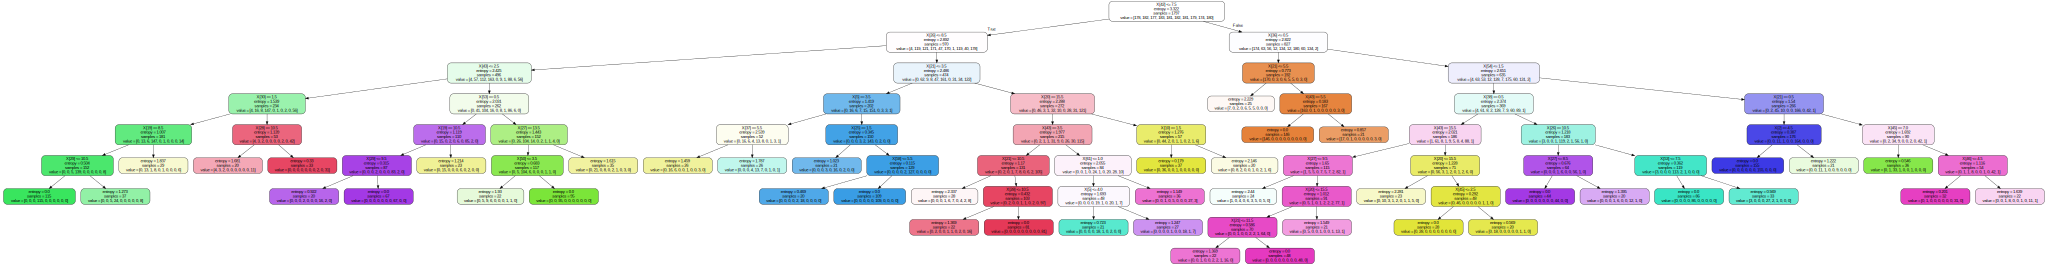

In [ ]:
dot_data = tree.export_graphviz(clf, out_file=None,
                                filled=True,rounded=True) 
graph = graphviz.Source(dot_data)

graph

**Test**

In [ ]:
limite = 5;
while (limite < 50):
    clf = tree.DecisionTreeClassifier(
      criterion= "entropy",
      splitter= "best",
      min_samples_split= 20,
      min_samples_leaf=limite,
      min_weight_fraction_leaf=0.0,
      max_features=None,
      random_state=None,
      max_leaf_nodes=None,
      class_weight=None,
      ccp_alpha = 0.0)
    clf = clf.fit(X, y)
    print("min_samples_leaf con un valor de ",limite)
    accuracy(clf,y_test,X_test)
    limite = limite + 5;

min_samples_leaf con un valor de  5
El accuracy es 0.9148148148148149
min_samples_leaf con un valor de  10
El accuracy es 0.9074074074074074
min_samples_leaf con un valor de  15
El accuracy es 0.8611111111111112
min_samples_leaf con un valor de  20
El accuracy es 0.8537037037037037
min_samples_leaf con un valor de  25
El accuracy es 0.8425925925925926
min_samples_leaf con un valor de  30
El accuracy es 0.8240740740740741
min_samples_leaf con un valor de  35
El accuracy es 0.8240740740740741
min_samples_leaf con un valor de  40
El accuracy es 0.8222222222222222
min_samples_leaf con un valor de  45
El accuracy es 0.7981481481481482


**Conclusiones**

En comparacion a los casos anteriores (variacion de max_depth), el aumento del valor del parametro (min_samples_leaf) mediante la realizacion del **test** ,    trajo consigo la disminucion del accuracy, por lo que se tomaron los valores de 10 y 20 respectivamente, con la finalidad de observar el contraste del accuracy y obtener su mayor valor. Por otra parte, al analizar la matriz de confusion, se puede afirmar que los numeros que presentaron mayores problemas para ser acertados son el numero 1 y 9.

- **Dos árboles de decisión (diferentes a los anteriores), sin limitar la profundidad, pero cada uno con diferentes umbrales de ganancia al generar los nodos hijos.**

In [ ]:
clf = tree.DecisionTreeClassifier(
    criterion= "entropy",
    splitter= "best",
    min_samples_split= 5,
    min_samples_leaf=10,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.02,
    class_weight=None,
    ccp_alpha = 0.0)
clf = clf.fit(X, y)


 **Medidas de desempeño del Sistema**

**Accuracy**

In [ ]:
accuracy(clf,y_test,X_test)


El accuracy es 0.8555555555555555


**Matriz de confusión**

In [ ]:

y_predicho = clf.predict(X_test)

cm = confusion_matrix(y_test, y_predicho)
print(cm)
acertados(cm)

[[41  0  0  0  1  0  0  0  0  3]
 [ 0 49  1  0  0  0  0  0  1  1]
 [ 1  3 40  4  0  0  0  0  4  1]
 [ 0  4  1 44  1  0  0  0  4  0]
 [ 1  0  0  0 33  1  0 10  3  0]
 [ 0  3  0  0  4 46  2  0  0  2]
 [ 0  1  1  0  0  0 57  0  1  0]
 [ 0  1  0  0  0  1  1 48  0  2]
 [ 0  1  0  0  0  0  0  0 58  2]
 [ 0  3  0  3  1  0  0  2  2 46]]
[43 65 43 51 40 48 60 60 73 57]
Numero 0 
Acertados  41
No acertados  6
El porcentaje de acertados es  87.2340425531915 %
Numero 1 
Acertados  49
No acertados  19
El porcentaje de acertados es  72.05882352941177 %
Numero 2 
Acertados  40
No acertados  16
El porcentaje de acertados es  71.42857142857143 %
Numero 3 
Acertados  44
No acertados  17
El porcentaje de acertados es  72.1311475409836 %
Numero 4 
Acertados  33
No acertados  22
El porcentaje de acertados es  60.0 %
Numero 5 
Acertados  46
No acertados  13
El porcentaje de acertados es  77.96610169491525 %
Numero 6 
Acertados  57
No acertados  6
El porcentaje de acertados es  90.47619047619048 %
Numero 7 


**Arbol**

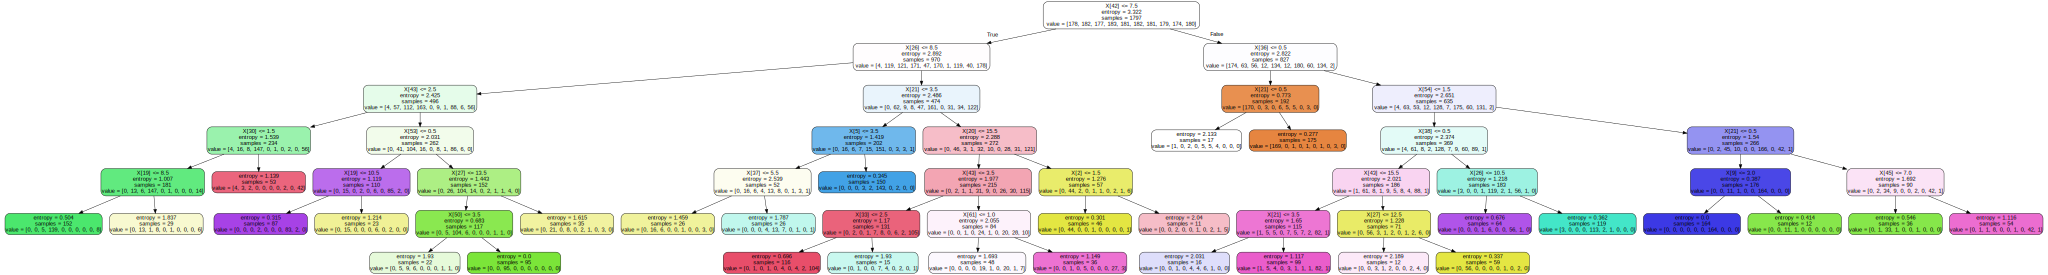

In [ ]:
dot_data = tree.export_graphviz(clf, out_file=None,
                                filled=True,rounded=True) 
graph = graphviz.Source(dot_data)

graph

In [ ]:
clf = tree.DecisionTreeClassifier(
    criterion= "entropy",
    splitter= "best",
    min_samples_split= 5,
    min_samples_leaf=10,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.04,
    class_weight=None,
    ccp_alpha = 0.0)
clf = clf.fit(X, y)



 **Medidas de desempeño del Sistema**

**Accuracy**

In [ ]:
accuracy(clf,y_test,X_test)


El accuracy es 0.8037037037037037


**Matriz de confusión**

In [ ]:

y_predicho = clf.predict(X_test)

cm = confusion_matrix(y_test, y_predicho)
print(cm)
acertados(cm)

[[42  0  0  0  0  0  0  0  0  3]
 [ 0 41  1  5  0  0  0  3  1  1]
 [ 1  3 37  5  0  0  3  0  3  1]
 [ 0  4  1 46  0  0  0  0  3  0]
 [ 2  4  0  0 28  1  0  2 11  0]
 [ 1  3  0  0  0 46  0  3  2  2]
 [ 0  1  1  0  0  0 55  0  3  0]
 [ 0  1  0  0  0  1  0 38 12  1]
 [ 0  3  0  0  0  0  0  0 57  1]
 [ 0  3  0  6  0  0  0  0  4 44]]
[46 63 40 62 28 48 58 46 96 53]
Numero 0 
Acertados  42
No acertados  7
El porcentaje de acertados es  85.71428571428571 %
Numero 1 
Acertados  41
No acertados  33
El porcentaje de acertados es  55.4054054054054 %
Numero 2 
Acertados  37
No acertados  19
El porcentaje de acertados es  66.07142857142857 %
Numero 3 
Acertados  46
No acertados  24
El porcentaje de acertados es  65.71428571428571 %
Numero 4 
Acertados  28
No acertados  20
El porcentaje de acertados es  58.333333333333336 %
Numero 5 
Acertados  46
No acertados  13
El porcentaje de acertados es  77.96610169491525 %
Numero 6 
Acertados  55
No acertados  8
El porcentaje de acertados es  87.301587301587

**Arbol**

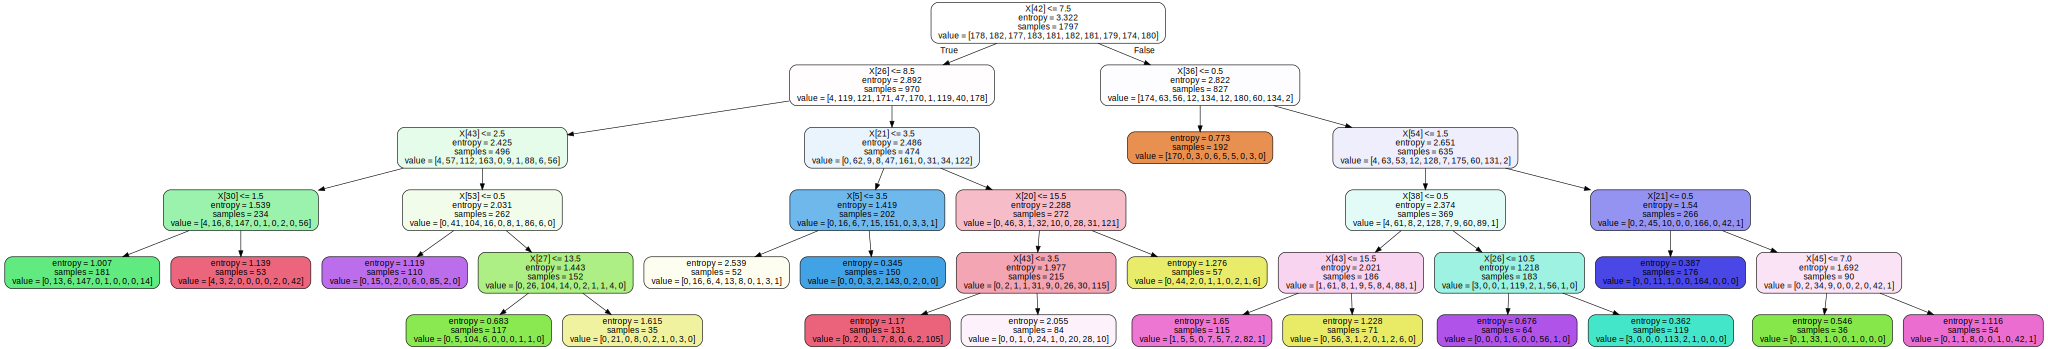

In [ ]:
dot_data = tree.export_graphviz(clf, out_file=None,
                                filled=True,rounded=True) 
graph = graphviz.Source(dot_data)

graph

**Grafica**

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

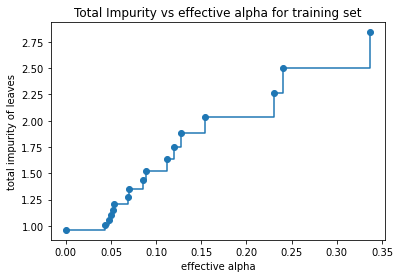

In [ ]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

**Test**

In [ ]:
limite = 0.0;
while (limite < 0.1):
    clf = tree.DecisionTreeClassifier(
      criterion= "entropy",
      splitter= "best",
      min_samples_split= 5,
      min_samples_leaf=10,
      min_weight_fraction_leaf=0.0,
      max_features=None,
      random_state=None,
      max_leaf_nodes=None,
      min_impurity_decrease=limite,
      class_weight=None,
      ccp_alpha = 0.0)
    clf = clf.fit(X, y)
    print("min_impurity_decrease con un valor de ",limite)
    accuracy(clf,y_test,X_test)
    limite = limite + 0.01;

min_impurity_decrease con un valor de  0.0
El accuracy es 0.9074074074074074
min_impurity_decrease con un valor de  0.01
El accuracy es 0.9018518518518519
min_impurity_decrease con un valor de  0.02
El accuracy es 0.8555555555555555
min_impurity_decrease con un valor de  0.03
El accuracy es 0.812962962962963
min_impurity_decrease con un valor de  0.04
El accuracy es 0.8037037037037037
min_impurity_decrease con un valor de  0.05
El accuracy es 0.7759259259259259
min_impurity_decrease con un valor de  0.060000000000000005
El accuracy es 0.7333333333333333
min_impurity_decrease con un valor de  0.07
El accuracy es 0.6796296296296296
min_impurity_decrease con un valor de  0.08
El accuracy es 0.6574074074074074
min_impurity_decrease con un valor de  0.09
El accuracy es 0.6574074074074074
min_impurity_decrease con un valor de  0.09999999999999999
El accuracy es 0.6574074074074074


**Conclusiones**

Con base a los resultados obtenidos mediante el test y la grafica, se puede afirmar que los parametros min_impurity_decrease y ccp_alpha estan muy relacionados en cuanto a su influencia en el accuraccy. Lo anterior implica que, a medida que el valor de cada uno de estos parametros aumenta, el accuracy va a disminuir. Por tal motivo escogimos como valores optimos: 0,02 y 0,04 respectivamente para cada uno de estos arboles, ya que en dichos valores hacen parte de los accuracies mas altos y a su vez, ejemplifican la diferencia que existe al aumentar el valor de dicho parametro. 

- **Dos árboles de decisión (diferentes a los anteriores), sin limitar la profundidad, pero podados con diferentes márgenes de confianza en la clasificación de los datos.**

In [ ]:
clf = tree.DecisionTreeClassifier(
    criterion= "entropy",
    splitter= "best",
    min_samples_split= 60,
    min_samples_leaf=30,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0,
    class_weight=None,
    ccp_alpha = 0.02)
clf = clf.fit(X, y)



 **Medidas de desempeño del Sistema**

**Accuracy**

In [ ]:
accuracy(clf,y_test,X_test)


El accuracy es 0.8240740740740741


**Matriz de confusión**

In [ ]:

y_predicho = clf.predict(X_test)

cm = confusion_matrix(y_test, y_predicho)
print(cm)
acertados(cm)

[[42  0  0  0  0  0  0  0  0  3]
 [ 0 44  1  5  0  0  0  0  1  1]
 [ 1  3 37  5  0  0  3  0  3  1]
 [ 0  4  1 46  0  0  0  0  3  0]
 [ 2  4  0  0 28  1  0 10  3  0]
 [ 1  6  0  0  0 46  0  0  2  2]
 [ 0  1  1  0  0  0 55  0  3  0]
 [ 0  4  0  0  0  1  0 46  1  1]
 [ 0  3  0  0  0  0  0  0 57  1]
 [ 0  3  0  6  0  0  0  2  2 44]]
[46 72 40 62 28 48 58 58 75 53]
Numero 0 
Acertados  42
No acertados  7
El porcentaje de acertados es  85.71428571428571 %
Numero 1 
Acertados  44
No acertados  36
El porcentaje de acertados es  55.00000000000001 %
Numero 2 
Acertados  37
No acertados  19
El porcentaje de acertados es  66.07142857142857 %
Numero 3 
Acertados  46
No acertados  24
El porcentaje de acertados es  65.71428571428571 %
Numero 4 
Acertados  28
No acertados  20
El porcentaje de acertados es  58.333333333333336 %
Numero 5 
Acertados  46
No acertados  13
El porcentaje de acertados es  77.96610169491525 %
Numero 6 
Acertados  55
No acertados  8
El porcentaje de acertados es  87.30158730158

**Arbol**

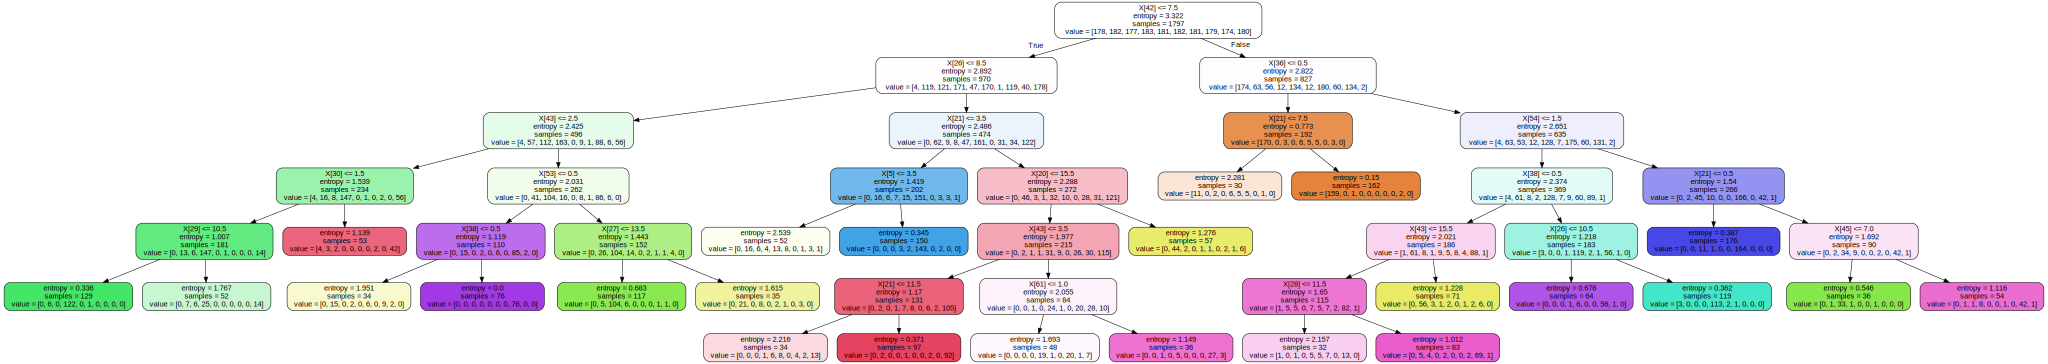

In [ ]:
dot_data = tree.export_graphviz(clf, out_file=None,
                                filled=True,rounded=True) 
graph = graphviz.Source(dot_data)

graph

In [ ]:
clf = tree.DecisionTreeClassifier(
    criterion= "entropy",
    splitter= "best",
    min_samples_split= 40,
    min_samples_leaf=10,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha = 0.04)
clf = clf.fit(X, y)



 **Medidas de desempeño del Sistema**

**Accuracy**

In [ ]:
accuracy(clf,y_test,X_test)


El accuracy es 0.8037037037037037


**Matriz de confusión**

In [ ]:

y_predicho = clf.predict(X_test)

cm = confusion_matrix(y_test, y_predicho)
print(cm)
acertados(cm)

[[42  0  0  0  0  0  0  0  0  3]
 [ 0 41  1  5  0  0  0  3  1  1]
 [ 1  3 37  5  0  0  3  0  3  1]
 [ 0  4  1 46  0  0  0  0  3  0]
 [ 2  4  0  0 28  1  0  2 11  0]
 [ 1  3  0  0  0 46  0  3  2  2]
 [ 0  1  1  0  0  0 55  0  3  0]
 [ 0  1  0  0  0  1  0 38 12  1]
 [ 0  3  0  0  0  0  0  0 57  1]
 [ 0  3  0  6  0  0  0  0  4 44]]
[46 63 40 62 28 48 58 46 96 53]
Numero 0 
Acertados  42
No acertados  7
El porcentaje de acertados es  85.71428571428571 %
Numero 1 
Acertados  41
No acertados  33
El porcentaje de acertados es  55.4054054054054 %
Numero 2 
Acertados  37
No acertados  19
El porcentaje de acertados es  66.07142857142857 %
Numero 3 
Acertados  46
No acertados  24
El porcentaje de acertados es  65.71428571428571 %
Numero 4 
Acertados  28
No acertados  20
El porcentaje de acertados es  58.333333333333336 %
Numero 5 
Acertados  46
No acertados  13
El porcentaje de acertados es  77.96610169491525 %
Numero 6 
Acertados  55
No acertados  8
El porcentaje de acertados es  87.301587301587

**Arbol**

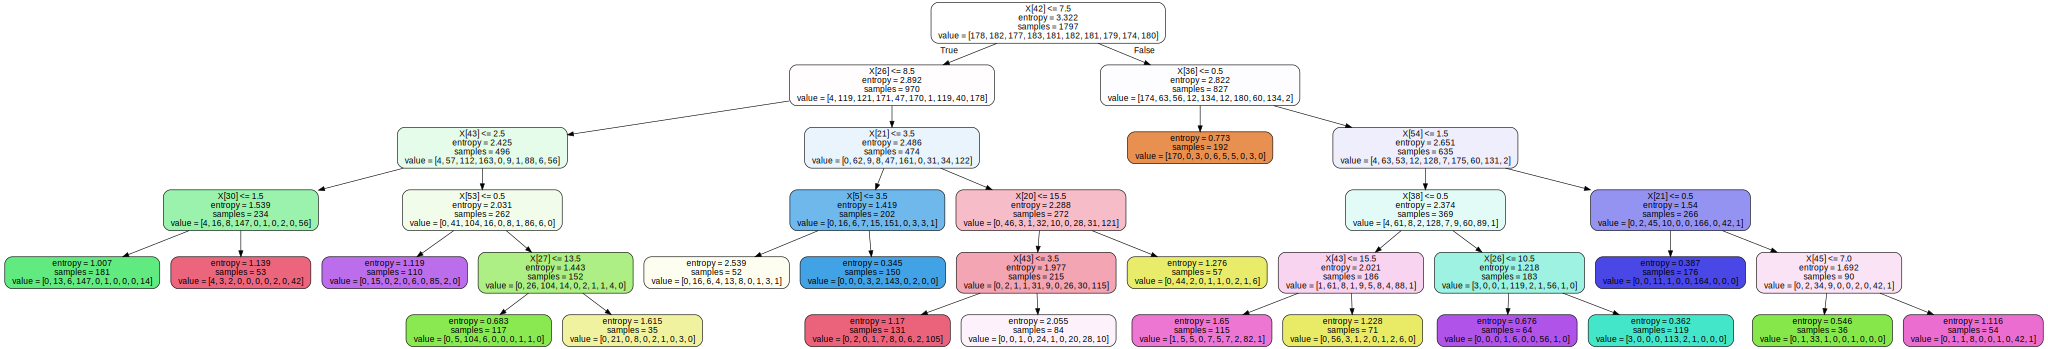

In [ ]:
dot_data = tree.export_graphviz(clf, out_file=None,
                                filled=True,rounded=True) 
graph = graphviz.Source(dot_data)

graph

**Grafica**

Number of nodes in the last tree is: 1 with ccp_alpha: 0.47844062310195046


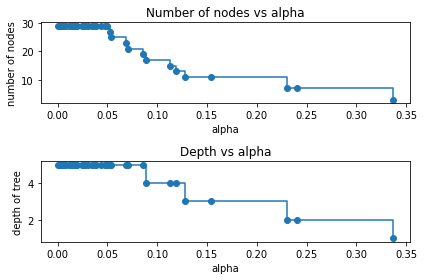

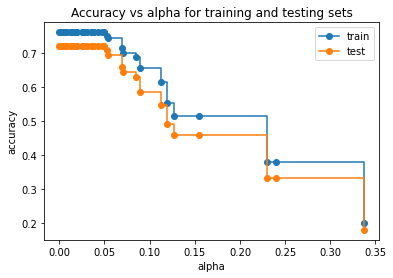

In [ ]:
import matplotlib.pyplot as plt
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
clfs = []
for ccp_alpha in ccp_alphas:
   clf = tree.DecisionTreeClassifier(
      criterion= "entropy",
      splitter= "best",
      min_samples_split= 40,
      min_samples_leaf=10,
      min_weight_fraction_leaf=0.0,
      max_features=None,
      random_state=None,
      max_leaf_nodes=None,
      min_impurity_decrease=0.05,
      class_weight=None,
      ccp_alpha = ccp_alpha)
   
   clf.fit(X_train, y_train)
   clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

**Test**

In [ ]:
limite = 0;
while (limite < 0.1):
    clf = tree.DecisionTreeClassifier(
      criterion= "entropy",
      splitter= "best",
      min_samples_split= 40,
      min_samples_leaf=10,
      min_weight_fraction_leaf=0.0,
      max_features=None,
      random_state=None,
      max_leaf_nodes=None,
      min_impurity_decrease=0,
      class_weight=None,
      ccp_alpha = limite)
    clf = clf.fit(X, y)
    print("ccp_alpha con un valor de ",limite)
    accuracy(clf,y_test,X_test)
    limite = limite + 0.01;

ccp_alpha con un valor de  0
El accuracy es 0.8814814814814815
ccp_alpha con un valor de  0.01
El accuracy es 0.8814814814814815
ccp_alpha con un valor de  0.02
El accuracy es 0.8555555555555555
ccp_alpha con un valor de  0.03
El accuracy es 0.812962962962963
ccp_alpha con un valor de  0.04
El accuracy es 0.8037037037037037
ccp_alpha con un valor de  0.05
El accuracy es 0.7759259259259259
ccp_alpha con un valor de  0.060000000000000005
El accuracy es 0.7333333333333333
ccp_alpha con un valor de  0.07
El accuracy es 0.6796296296296296
ccp_alpha con un valor de  0.08
El accuracy es 0.6574074074074074
ccp_alpha con un valor de  0.09
El accuracy es 0.6574074074074074
ccp_alpha con un valor de  0.09999999999999999
El accuracy es 0.6574074074074074


**Conclusiones**

Con base a las anteriores graficas y el test realizado, se puede apreciar que a medida que el valor de ccp_alpha disminuye, el accuracy tambien, por lo cual se recurrio a valores pequeños de ccp_alpha, con la finalidad de obtener un accuraccy optimo. Por otra parte se puede afirmar que, la profundidad y el numero de nodos no va a incidir de una forma determinante en el resultado del accuracy. Cabe recalcar que valores mayores a 0.04 de alpha, generaran que la deteccion de los numeros llegue hasta un 50% de efectividad, lo cual hace inutilizable el modelo, al no poder predecir con mas del 50% de tasa de acierto.

# **2. Random Forest.**

In [ ]:
#----Primer sistema con poco numeros de arboles------ 
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

np.random.seed(1870)
dataset=datasets.load_digits()
#print(dataset)
#print('Informacion del dataset: ')
#print(dataset.keys())
#print()
#print('Caracteristicas del dataset: ')
#print(dataset.DESCR)
X=dataset.data
y=dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

algoritmo = RandomForestClassifier(
          n_estimators =10,
          #integer, optional (default=100)
          criterion="gini",
          #string, optional (default=”gini”)
          max_depth=None,
          #integer or None, optional (default=None)
          min_samples_split=2,
          #int, float, optional (default=2)
          min_samples_leaf=1,
          #int, float, optional (default=1)
          min_weight_fraction_leaf=0.0,
          #float, optional (default=0.)
          max_features='auto',
          #int, float, string or None, optional (default=”auto”)
          max_leaf_nodes=None,
          #int or None, optional (default=None)
          min_impurity_decrease=0.0,
          #float, optional (default=0.)
          bootstrap=True,
          #boolean, optional (default=True)
          oob_score=False,
          #bool (default=False)
          n_jobs=None,
          #int or None, optional (default=None)
          random_state=None,
          #int, RandomState instance or None, optional (default=None)
          verbose=0,
          #int, optional (default=0)
          warm_start=False,
          #bool, optional (default=False)
          ccp_alpha=0.0,
          #non-negative float, optional (default=0.0)
          max_samples=None
          #int or float, default=None
          )

algoritmo.fit(X_train, y_train)
y_pred = algoritmo.predict(X_test)

matriz = confusion_matrix(y_test, y_pred)
print('Matriz de confusion: ')
print(matriz)

precision = accuracy_score(y_test, y_pred)
print('Precision del modelo: ')
print(precision)

Matriz de confusion: 
[[46  0  0  0  0  0  0  0  0  0]
 [ 0 46  0  0  1  0  0  0  3  0]
 [ 1  3 38  0  0  0  0  0  0  1]
 [ 0  2  1 53  0  0  0  2  2  0]
 [ 0  1  0  0 60  0  0  1  0  0]
 [ 1  0  1  0  3 55  0  1  0  1]
 [ 0  1  0  0  1  0 49  0  0  0]
 [ 0  0  0  0  1  0  0 47  0  1]
 [ 0  5  0  0  0  1  1  1 47  1]
 [ 0  0  0  1  1  2  0  3  0 54]]
Precision del modelo: 
0.9166666666666666


In [ ]:
#----Segundo sistema de arboles con numero de arboles elevado-----


np.random.seed(1870)
X=dataset.data
y=dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

algoritmo = RandomForestClassifier(
          n_estimators =1000,
          #integer, optional (default=100)
          criterion="gini",
          #string, optional (default=”gini”)
          max_depth=None,
          #integer or None, optional (default=None)
          min_samples_split=2,
          #int, float, optional (default=2)
          min_samples_leaf=1,
          #int, float, optional (default=1)
          min_weight_fraction_leaf=0.0,
          #float, optional (default=0.)
          max_features='auto',
          #int, float, string or None, optional (default=”auto”)
          max_leaf_nodes=None,
          #int or None, optional (default=None)
          min_impurity_decrease=0.0,
          #float, optional (default=0.)
          bootstrap=True,
          #boolean, optional (default=True)
          oob_score=False,
          #bool (default=False)
          n_jobs=None,
          #int or None, optional (default=None)
          random_state=None,
          #int, RandomState instance or None, optional (default=None)
          verbose=0,
          #int, optional (default=0)
          warm_start=False,
          #bool, optional (default=False)
          ccp_alpha=0.0,
          #non-negative float, optional (default=0.0)
          max_samples=None
          #int or float, default=None
          )

algoritmo.fit(X_train, y_train)
y_pred = algoritmo.predict(X_test)

matriz = confusion_matrix(y_test, y_pred)
print('Matriz de confusion: ')
print(matriz)

precision = accuracy_score(y_test, y_pred)
print('Precision del modelo: ')
print(precision)

Matriz de confusion: 
[[46  0  0  0  0  0  0  0  0  0]
 [ 0 50  0  0  0  0  0  0  0  0]
 [ 1  1 41  0  0  0  0  0  0  0]
 [ 0  0  0 56  0  1  0  2  1  0]
 [ 0  1  0  0 60  0  0  1  0  0]
 [ 0  0  0  0  1 58  2  0  1  0]
 [ 0  0  0  0  0  0 51  0  0  0]
 [ 0  0  0  0  0  0  0 48  0  1]
 [ 0  4  0  0  0  0  0  1 50  1]
 [ 0  0  0  0  0  1  0  3  1 56]]
Precision del modelo: 
0.9555555555555556


**Figura 1**

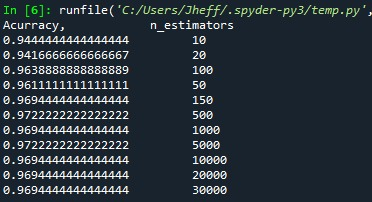


**Figura 2**

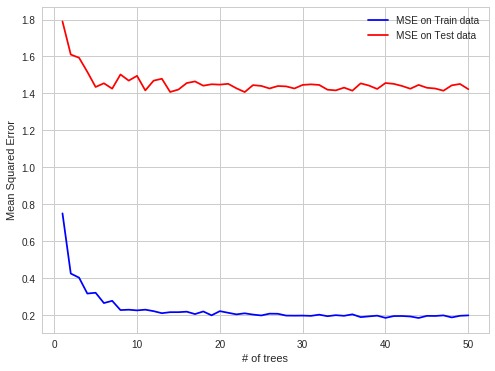

**Conclusiones**

Como se puede apreciar en los resultados anteriores, al incrementar el numero de arboles el error de generalizacion se aproxima cada vez mas a cero , con lo cual obtenemos un acurracy mas alto debido a que los sesgos estadisticos se ven reducidos conforme existen mas estimadores generados aleatoriamente, lo cual evita en cierta medida el overfit del modelo. El sobreajuste se puede dar en algunos casos puntuales, pero con los valores correctos de los hiperparametros se puede obtener un rendimiento óptimo. En la figura 1 se puede observar que al incrementar absurdamente la cantidad de arboles del sistema llega un punto en el que simplemente ya se obtuvo toda la informacion que nos podian dar los datos. En la figura 2 obversamos que el algoritmo tiende a estabilizarse despues de cierto n para n_estimators que segun nuestro analisis del problema esta dado por la cantidad limitada de datos del dataset, al generar aleatoriamente árboles con caracteristicas y subconjuntos de datos especificos en un momento dado se comenzaran a repetir porque todas las posibles combinaciones de caracteristicas y subconjuntos de datos ya existirán y los nuevos árboles generados más allá de ese limite simplemente se empezaran a repetir árboles. Con la repetición de árboles no se realiza ningún aporte de valor al modelo por lo cual para un n lejano de árboles siempre se estabilizará el sistema —acurracy— con lo cual se deduce y reafirma que dicho limite esta dado por la cantidad de datos proporcionadas.

In [ ]:
#Primer sistema de arboles con numero  bajo de caracteristicas  
np.random.seed(1870)
X=dataset.data
y=dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

algoritmo = RandomForestClassifier(
          n_estimators =100,
          #integer, optional (default=100)
          criterion="gini",
          #string, optional (default=”gini”)
          max_depth=None,
          #integer or None, optional (default=None)
          min_samples_split=2,
          #int, float, optional (default=2)
          min_samples_leaf=1,
          #int, float, optional (default=1)
          min_weight_fraction_leaf=0.0,
          #float, optional (default=0.)
          max_features=1,
          #int, float, string or None, optional (default=”auto”)
          max_leaf_nodes=None,
          #int or None, optional (default=None)
          min_impurity_decrease=0.0,
          #float, optional (default=0.)
          bootstrap=True,
          #boolean, optional (default=True)
          oob_score=False,
          #bool (default=False)
          n_jobs=None,
          #int or None, optional (default=None)
          random_state=None,
          #int, RandomState instance or None, optional (default=None)
          verbose=0,
          #int, optional (default=0)
          warm_start=False,
          #bool, optional (default=False)
          ccp_alpha=0.0,
          #non-negative float, optional (default=0.0)
          max_samples=None
          #int or float, default=None
          )

algoritmo.fit(X_train, y_train)
y_pred = algoritmo.predict(X_test)

matriz = confusion_matrix(y_test, y_pred)
print('Matriz de confusion: ')
print(matriz)

precision = accuracy_score(y_test, y_pred)
print('Precision del modelo: ')
print(precision)

Matriz de confusion: 
[[46  0  0  0  0  0  0  0  0  0]
 [ 0 50  0  0  0  0  0  0  0  0]
 [ 0  0 43  0  0  0  0  0  0  0]
 [ 0  0  0 56  0  1  0  1  2  0]
 [ 0  0  0  0 60  0  0  2  0  0]
 [ 0  0  0  1  1 59  1  0  0  0]
 [ 0  1  0  0  0  0 50  0  0  0]
 [ 0  0  0  0  0  0  0 48  0  1]
 [ 0  4  2  0  0  1  0  1 47  1]
 [ 0  0  0  2  0  1  0  2  0 56]]
Precision del modelo: 
0.9537037037037037


In [ ]:
#Segundo sistema de arboles con numero alto de caracterizticas  
np.random.seed(1870)
X=dataset.data
y=dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

algoritmo = RandomForestClassifier(
          n_estimators =100,
          #integer, optional (default=100)
          criterion="gini",
          #string, optional (default=”gini”)
          max_depth=None,
          #integer or None, optional (default=None)
          min_samples_split=2,
          #int, float, optional (default=2)
          min_samples_leaf=1,
          #int, float, optional (default=1)
          min_weight_fraction_leaf=0.0,
          #float, optional (default=0.)
          max_features = 8,
          #int, float, string or None, optional (default=”auto”)
          max_leaf_nodes=None,
          #int or None, optional (default=None)
          min_impurity_decrease=0.0,
          #float, optional (default=0.)
          bootstrap=True,
          #boolean, optional (default=True)
          oob_score=False,
          #bool (default=False)
          n_jobs=None,
          #int or None, optional (default=None)
          random_state=None,
          #int, RandomState instance or None, optional (default=None)
          verbose=0,
          #int, optional (default=0)
          warm_start=False,
          #bool, optional (default=False)
          ccp_alpha=0.0,
          #non-negative float, optional (default=0.0)
          max_samples=None
          #int or float, default=None
          )

algoritmo.fit(X_train, y_train)
y_pred = algoritmo.predict(X_test)

matriz = confusion_matrix(y_test, y_pred)
print('Matriz de confusion: ')
print(matriz)

precision = accuracy_score(y_test, y_pred)
print('Precision del modelo: ')
print(precision)

Matriz de confusion: 
[[46  0  0  0  0  0  0  0  0  0]
 [ 0 49  0  0  0  1  0  0  0  0]
 [ 1  1 40  1  0  0  0  0  0  0]
 [ 0  0  1 55  0  1  0  2  1  0]
 [ 0  1  0  0 61  0  0  0  0  0]
 [ 0  0  0  0  2 57  2  0  0  1]
 [ 0  0  0  0  0  0 51  0  0  0]
 [ 0  0  0  0  0  0  0 48  0  1]
 [ 0  4  0  0  0  0  0  1 50  1]
 [ 0  0  0  1  0  1  0  2  0 57]]
Precision del modelo: 
0.9518518518518518


**Imagen**

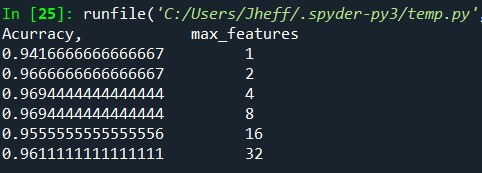

**Conclusiones**

 Como podemos apreciar cuando incrementamos las características de los árboles en el bosque aleatorio las variaciones son mínimas. El algoritmo de RandomForest selecciona aleatoriamente un grupo de características, que por el funcionamiento de los Árboles de Decisión las características con más grado de importancia serán las principalmente usadas para la clasificación. Cuando incrementamos el número de características a tener en cuenta como en el caso anterior, lo único que estamos haciendo es añadirle 'ruido' al modelo debido a que por un lado al aumentar el número de características de los árboles , existian ciertas caracteristicas las cuales no aportaban a la clasificación final y que en caso de poseer alguna impureza , produciría perdida de precisión del modelo, y por otro lado al definir un numero de características le estamos quitando parte de la doble aleatoriedad del sistema sobre la cual se basa su exactitud. 
En la figura adjunta se puede reconocer los cambios en el acurracy del modelo conforme aumenta el número de características, con ello se evidencia que los cambios más significativos en la precisión están dados por las primeras características de la lista, dado que el algoritmo las ordena por su importancia. Esto también nos dice que se debe escoger un número prudente de características a evaluar en el árbol, siendo sqrt(n) o log_2(n) los valores por excelencia , dado que generalmente es con ese conjunto que se concentra más del 70% de la precisión del modelo. Aunque también se debe recalcar que esto varía respecto a las particularidades de cada modelo y tomando como caso el este modelo de prueba (load_digits) , se puede especular que el n óptimo de features es menor que log_2(n), lo cual ahorra tiempo y recursos computacionales durante la fase de entrenamiento. 


# **3. Clasificador Naive Bayesiano**

Elegimos el NBC gaussiano debido a que se acopla muy bien con el conjunto de datos load_digits y a su vez nos proporciona un accuracy óptimo. Adicionalmente se puede observar dicho accuracy junto a la matriz de confusion del sistema y la grafica de los numeros acertados/no acertados. El clasificador Naive Gaussiano es ideal en problemas que impliquen clasificación de datos. Tambien es el indicado para trabajar con conjuntos de datos discretos que sigan una distribución normal o gaussiana. Para usar el clasificador categorico resulta necesario modificar el conjunto de datos a utilizar para que tenga una estructura categorica teniendo en cuenta usa serie de categorias que se han definido para los datos para que pueda funcionar. Por tal motivo, se decidio implementar el clasificador gausiano dado a que se obtuvo un buen valor de accuracy para este conjunto de datos. Por ultimo, al hacer pruebas en la celda Test, se puede observar que al variar el parametro var_smoothing, el accuracy aumenta y disminuye para ciertos valores, sin embargo, la diferencia no es significativa.



**NBC Gaussiano**

El acurracy es 0.8240740740740741
Matriz de confusión
[[45  0  0  0  0  0  0  0  0  0]
 [ 0 46  0  0  0  0  0  0  6  0]
 [ 0  6 26  5  0  0  0  0 16  0]
 [ 0  0  0 46  0  0  0  1  6  1]
 [ 0  3  0  0 36  0  2  7  0  0]
 [ 0  1  0  2  0 51  1  2  0  0]
 [ 0  0  1  0  0  0 59  0  0  0]
 [ 0  0  0  0  1  0  0 52  0  0]
 [ 0  5  0  3  0  1  0  1 51  0]
 [ 0  1  0 14  1  0  0  3  5 33]]
[45 62 27 70 38 52 62 66 84 34]
Numero 0 
Acertados  45
No acertados  0
El porcentaje de acertados es  100.0 %
Numero 1 
Acertados  46
No acertados  22
El porcentaje de acertados es  67.64705882352942 %
Numero 2 
Acertados  26
No acertados  28
El porcentaje de acertados es  48.148148148148145 %
Numero 3 
Acertados  46
No acertados  32
El porcentaje de acertados es  58.97435897435898 %
Numero 4 
Acertados  36
No acertados  14
El porcentaje de acertados es  72.0 %
Numero 5 
Acertados  51
No acertados  7
El porcentaje de acertados es  87.93103448275862 %
Numero 6 
Acertados  59
No acertados  4
El porcentaje de 

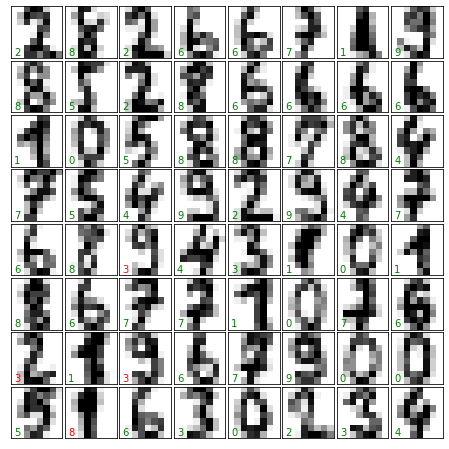

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split


np.random.seed(1870)
X, y = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# train the model
clf = GaussianNB(var_smoothing=1e-09)
clf.fit(X_train, y_train)

# use the model to predict the labels of the test data
y_esperado = y_test
y_predicho = clf.predict(X_test)

print("El acurracy es",accuracy_score(y_esperado,y_predicho))
print("Matriz de confusión")

cm = confusion_matrix(y_esperado, y_predicho)
print(cm)
acertados(cm)

# Plot the prediction
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test.reshape(-1, 8, 8)[i], cmap=plt.cm.binary,
              interpolation='nearest')

    # label the image with the target value
    if y_predicho[i] == y_esperado[i]:
        ax.text(0, 7, str(y_predicho[i]), color='green')
    else:
        ax.text(0, 7, str(y_predicho[i]), color='red')

**Test**

In [ ]:

limite = 1e-09


while (limite < 0.100000):
  clf = GaussianNB(var_smoothing=limite)
  clf.fit(X_train, y_train)
  accuracy(clf, y_test, X_test)
  limite += 0.0001
  print(limite)


El accuracy es 0.8240740740740741
0.00010000100000000001
El accuracy es 0.8907407407407407
0.000200001
El accuracy es 0.8981481481481481
0.000300001
El accuracy es 0.9
0.000400001
El accuracy es 0.9018518518518519
0.000500001
El accuracy es 0.9018518518518519
0.0006000010000000001
El accuracy es 0.9018518518518519
0.0007000010000000001
El accuracy es 0.9018518518518519
0.0008000010000000002
El accuracy es 0.9018518518518519
0.0009000010000000002
El accuracy es 0.9018518518518519
0.0010000010000000001
El accuracy es 0.9037037037037037
0.0011000010000000002
El accuracy es 0.9037037037037037
0.0012000010000000002
El accuracy es 0.9055555555555556
0.0013000010000000003
El accuracy es 0.9055555555555556
0.0014000010000000003
El accuracy es 0.9074074074074074
0.0015000010000000004
El accuracy es 0.9074074074074074
0.0016000010000000004
El accuracy es 0.9055555555555556
0.0017000010000000005
El accuracy es 0.9055555555555556
0.0018000010000000005
El accuracy es 0.9074074074074074
0.0019000010

# **Referencias**
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

- https://www.youtube.com/watch?v=XABw4Y3GBR4

- https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html#sphx-glr-auto-examples-tree-plot-cost-complexity-pruning-py

- https://scipy-lectures.org/packages/scikit-learn/auto_examples/plot_digits_simple_classif.html

- https://towardsdatascience.com/how-to-impliment-a-gaussian-naive-bayes-classifier-in-python-from-scratch-11e0b80faf5a

- https://stackoverrun.com/es/q/3853036

- https://datascience.stackexchange.com/questions/1028/do-random-forest-overfit
https://en.wikipedia.org/wiki/Talk%3ARandom_forest
- https://stats.stackexchange.com/questions/111968/random-forest-how-to-handle-overfitting
- https://en.wikipedia.org/wiki/Talk%3ARandom_forest
- https://www.quora.com/Do-random-forests-tend-to-overfit-as-more-trees-are-added
-https://mljar.com/blog/random-forest-overfitting/#:~:text=The%20Random%20Forest%20algorithm%20does,the%20algorithm%20should%20be%20tuned.

* https://www.aprendemachinelearning.com/random-forest-el-poder-del-ensamble/
* https://towardsdatascience.com/*improving-random-forest-in-python-part-1-893916666cd
*https://towardsdatascience.com/random-forest-in-python-24d0893d51c0